### Trajectory analysis of Myocardial Infarction using PILOT

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA Data!

Here we show the whole process for applying PILOT to scRNA data using Myocardial Infarction scRNA Data, you can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad).

</div>

In [1]:
import PILOT as pl
import scanpy as sc

##### Reading Anndata

In [2]:
adata=sc.read_h5ad('/Datasets/myocardial_infarction.h5ad')

###### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(adata,emb_matrix='PCA',
clusters_col='cell_subtype',sample_col='sampleID',status='Status')

##### Ploting the Cost matrix and the Wasserstein distance:
<div class="alert alert-block alert-info"> 
 Here we show the heatmaps of Cost matrix (cells) and Wasserstein distance (samples).      
</div>

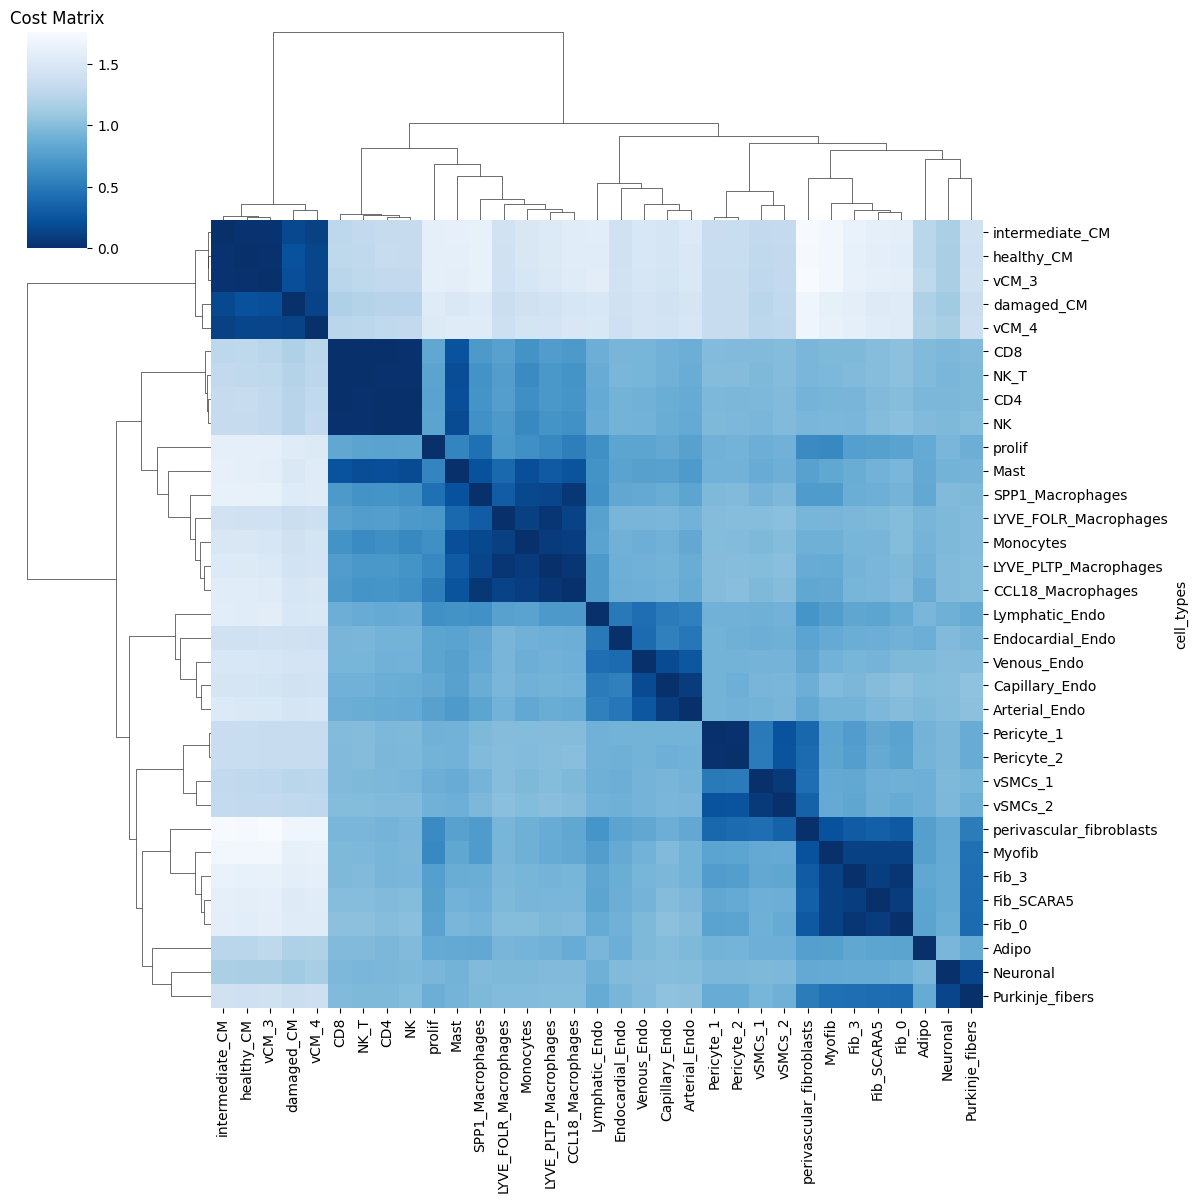

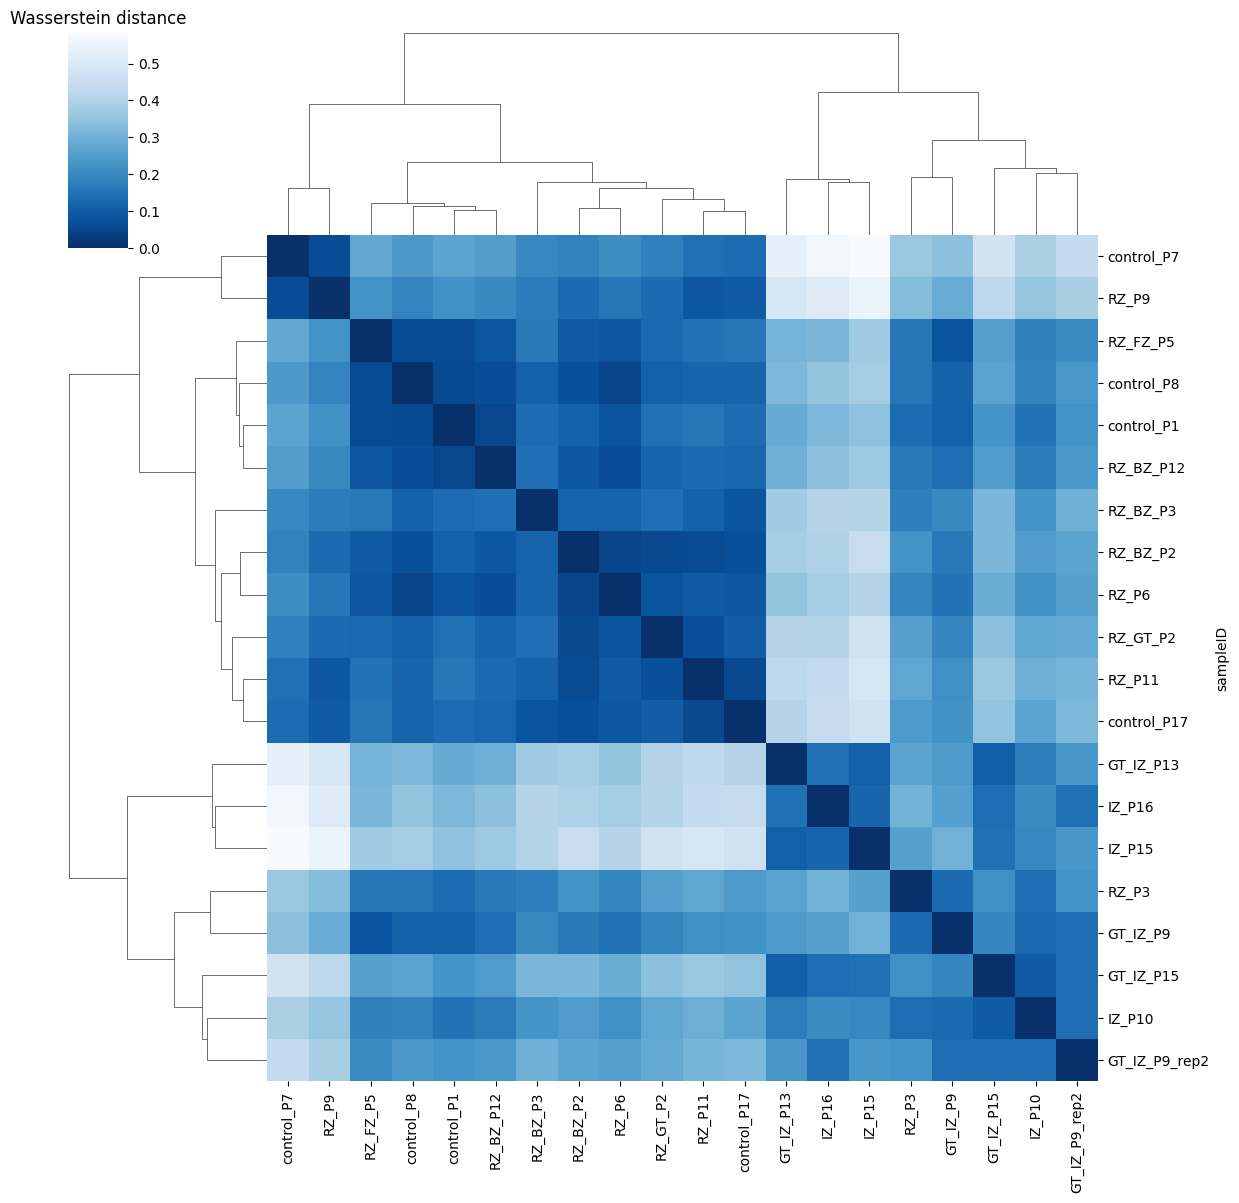

In [4]:
pl.pl.heatmaps(adata)

##### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.
</div>

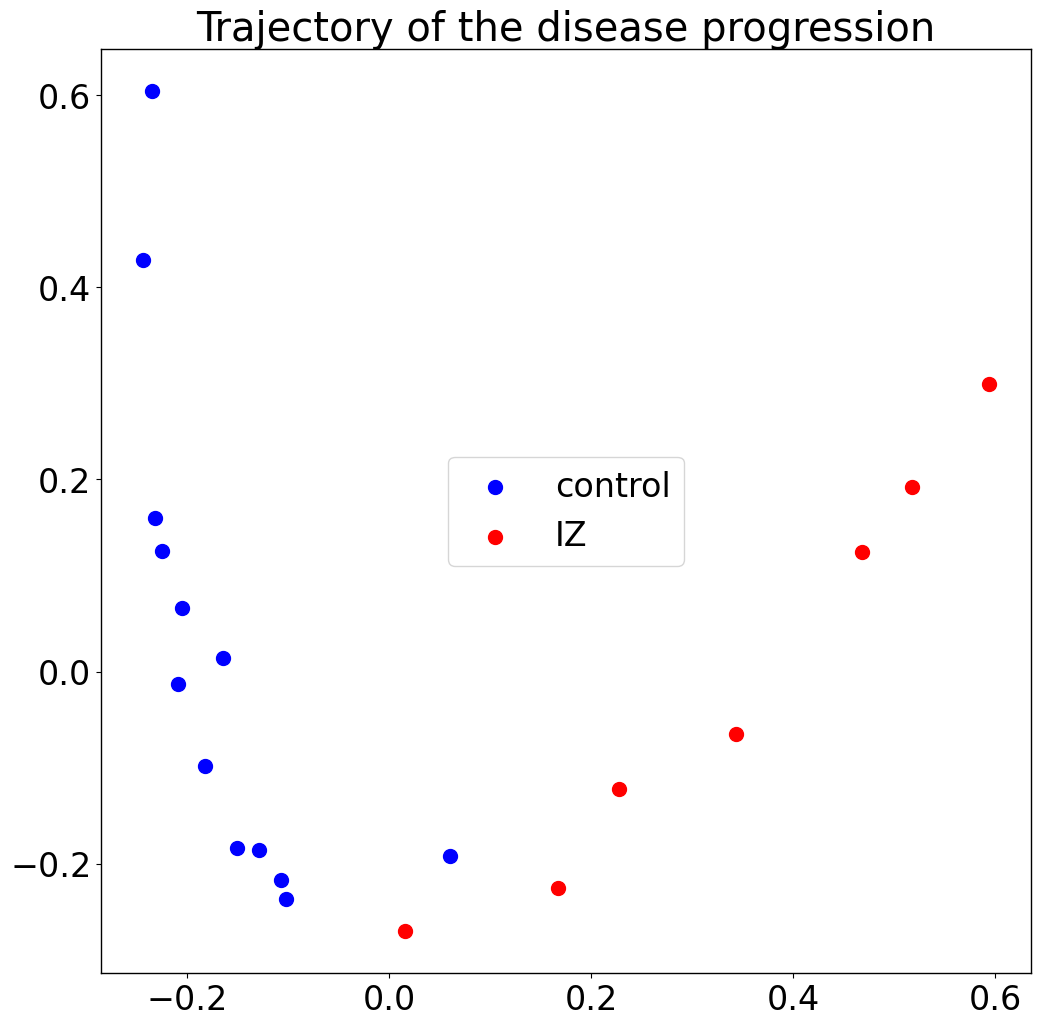

In [5]:
pl.pl.trajectory(adata,colors=['Blue','red'])

#####  Fit a principal graph:
<div class="alert alert-block alert-info"> 
The difussion map creates an embeding that potentially reveals a trajectory in the data. Next, PILOT explores EIPLGraph to find the structure of the trajectory. An important parameter is the source_node, which indicate the start of the trajectory. Here, we selected a control sample. This method returns a rank samples, which we define as a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample.
</div>


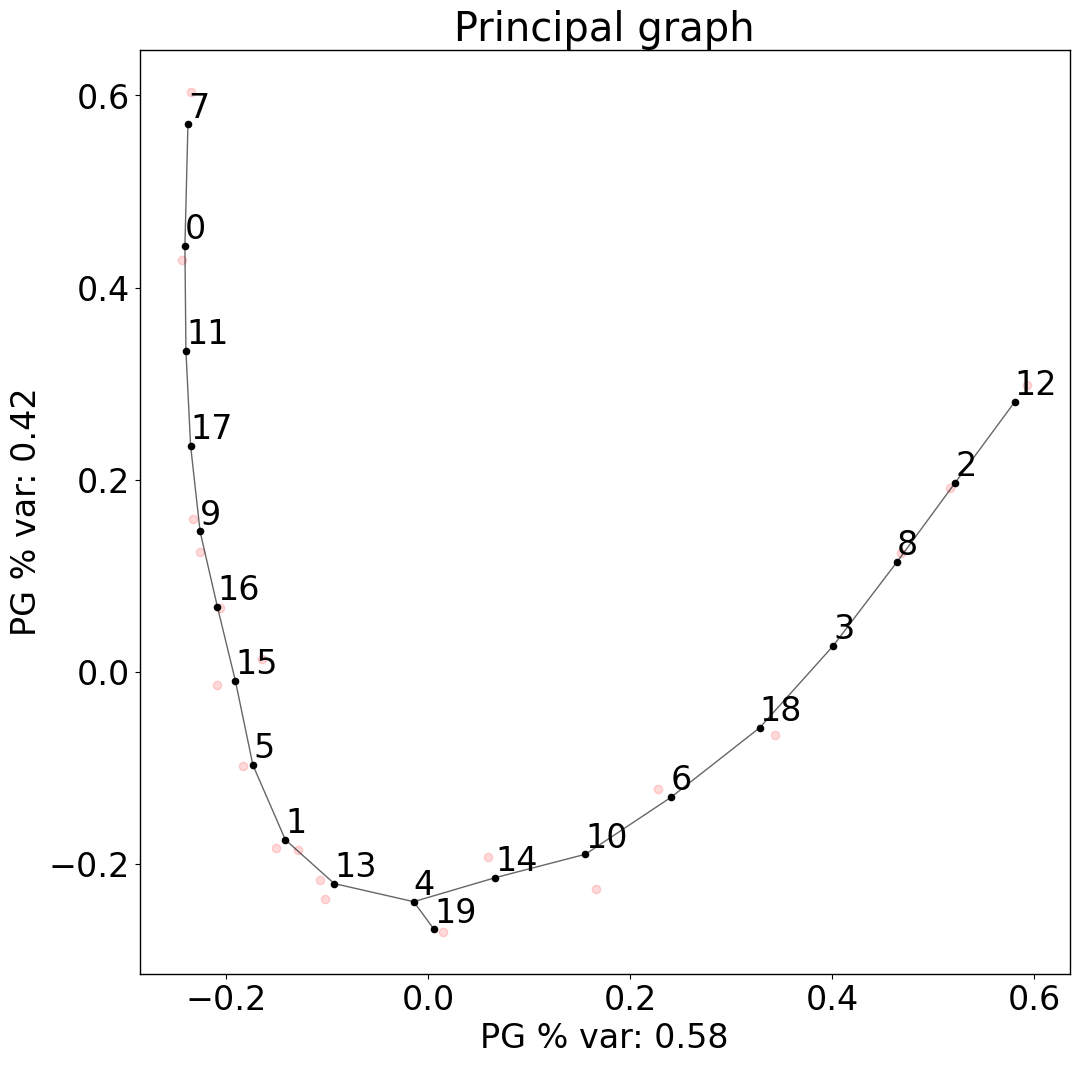

In [6]:
pl.pl.fit_pricipla_graph(adata,source_node=7)

#####  Cell-type importance:
<div class="alert alert-block alert-info"> 
Next, we can use the robust regression model to find cells whose proportions change linearly or non-linearly with disease progression. As indicated in the paper, major halmarks of MI progression are detected, i.e., a decrease of cardiomyocyte cells (CM) and an increase of fibroblasts and myeloid cells.
</div>

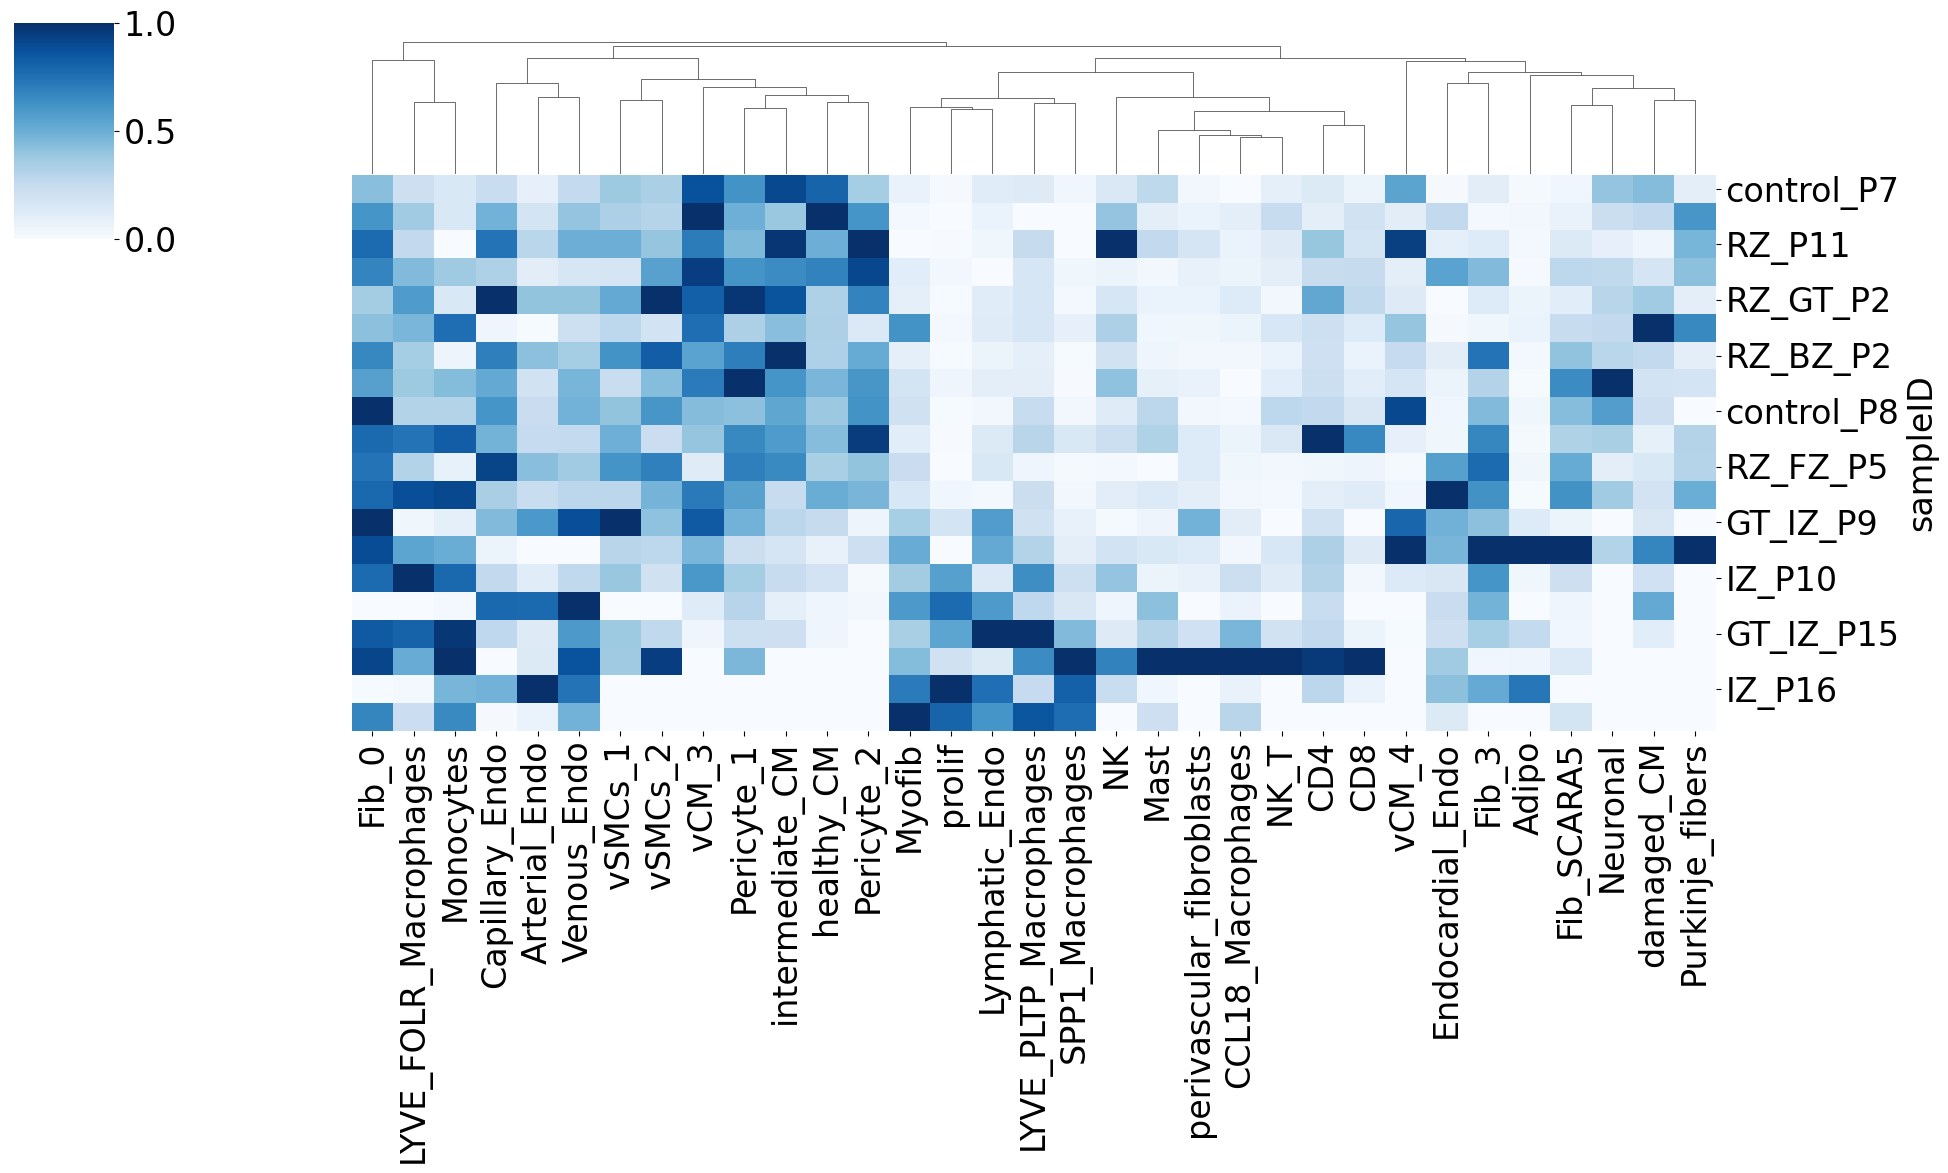

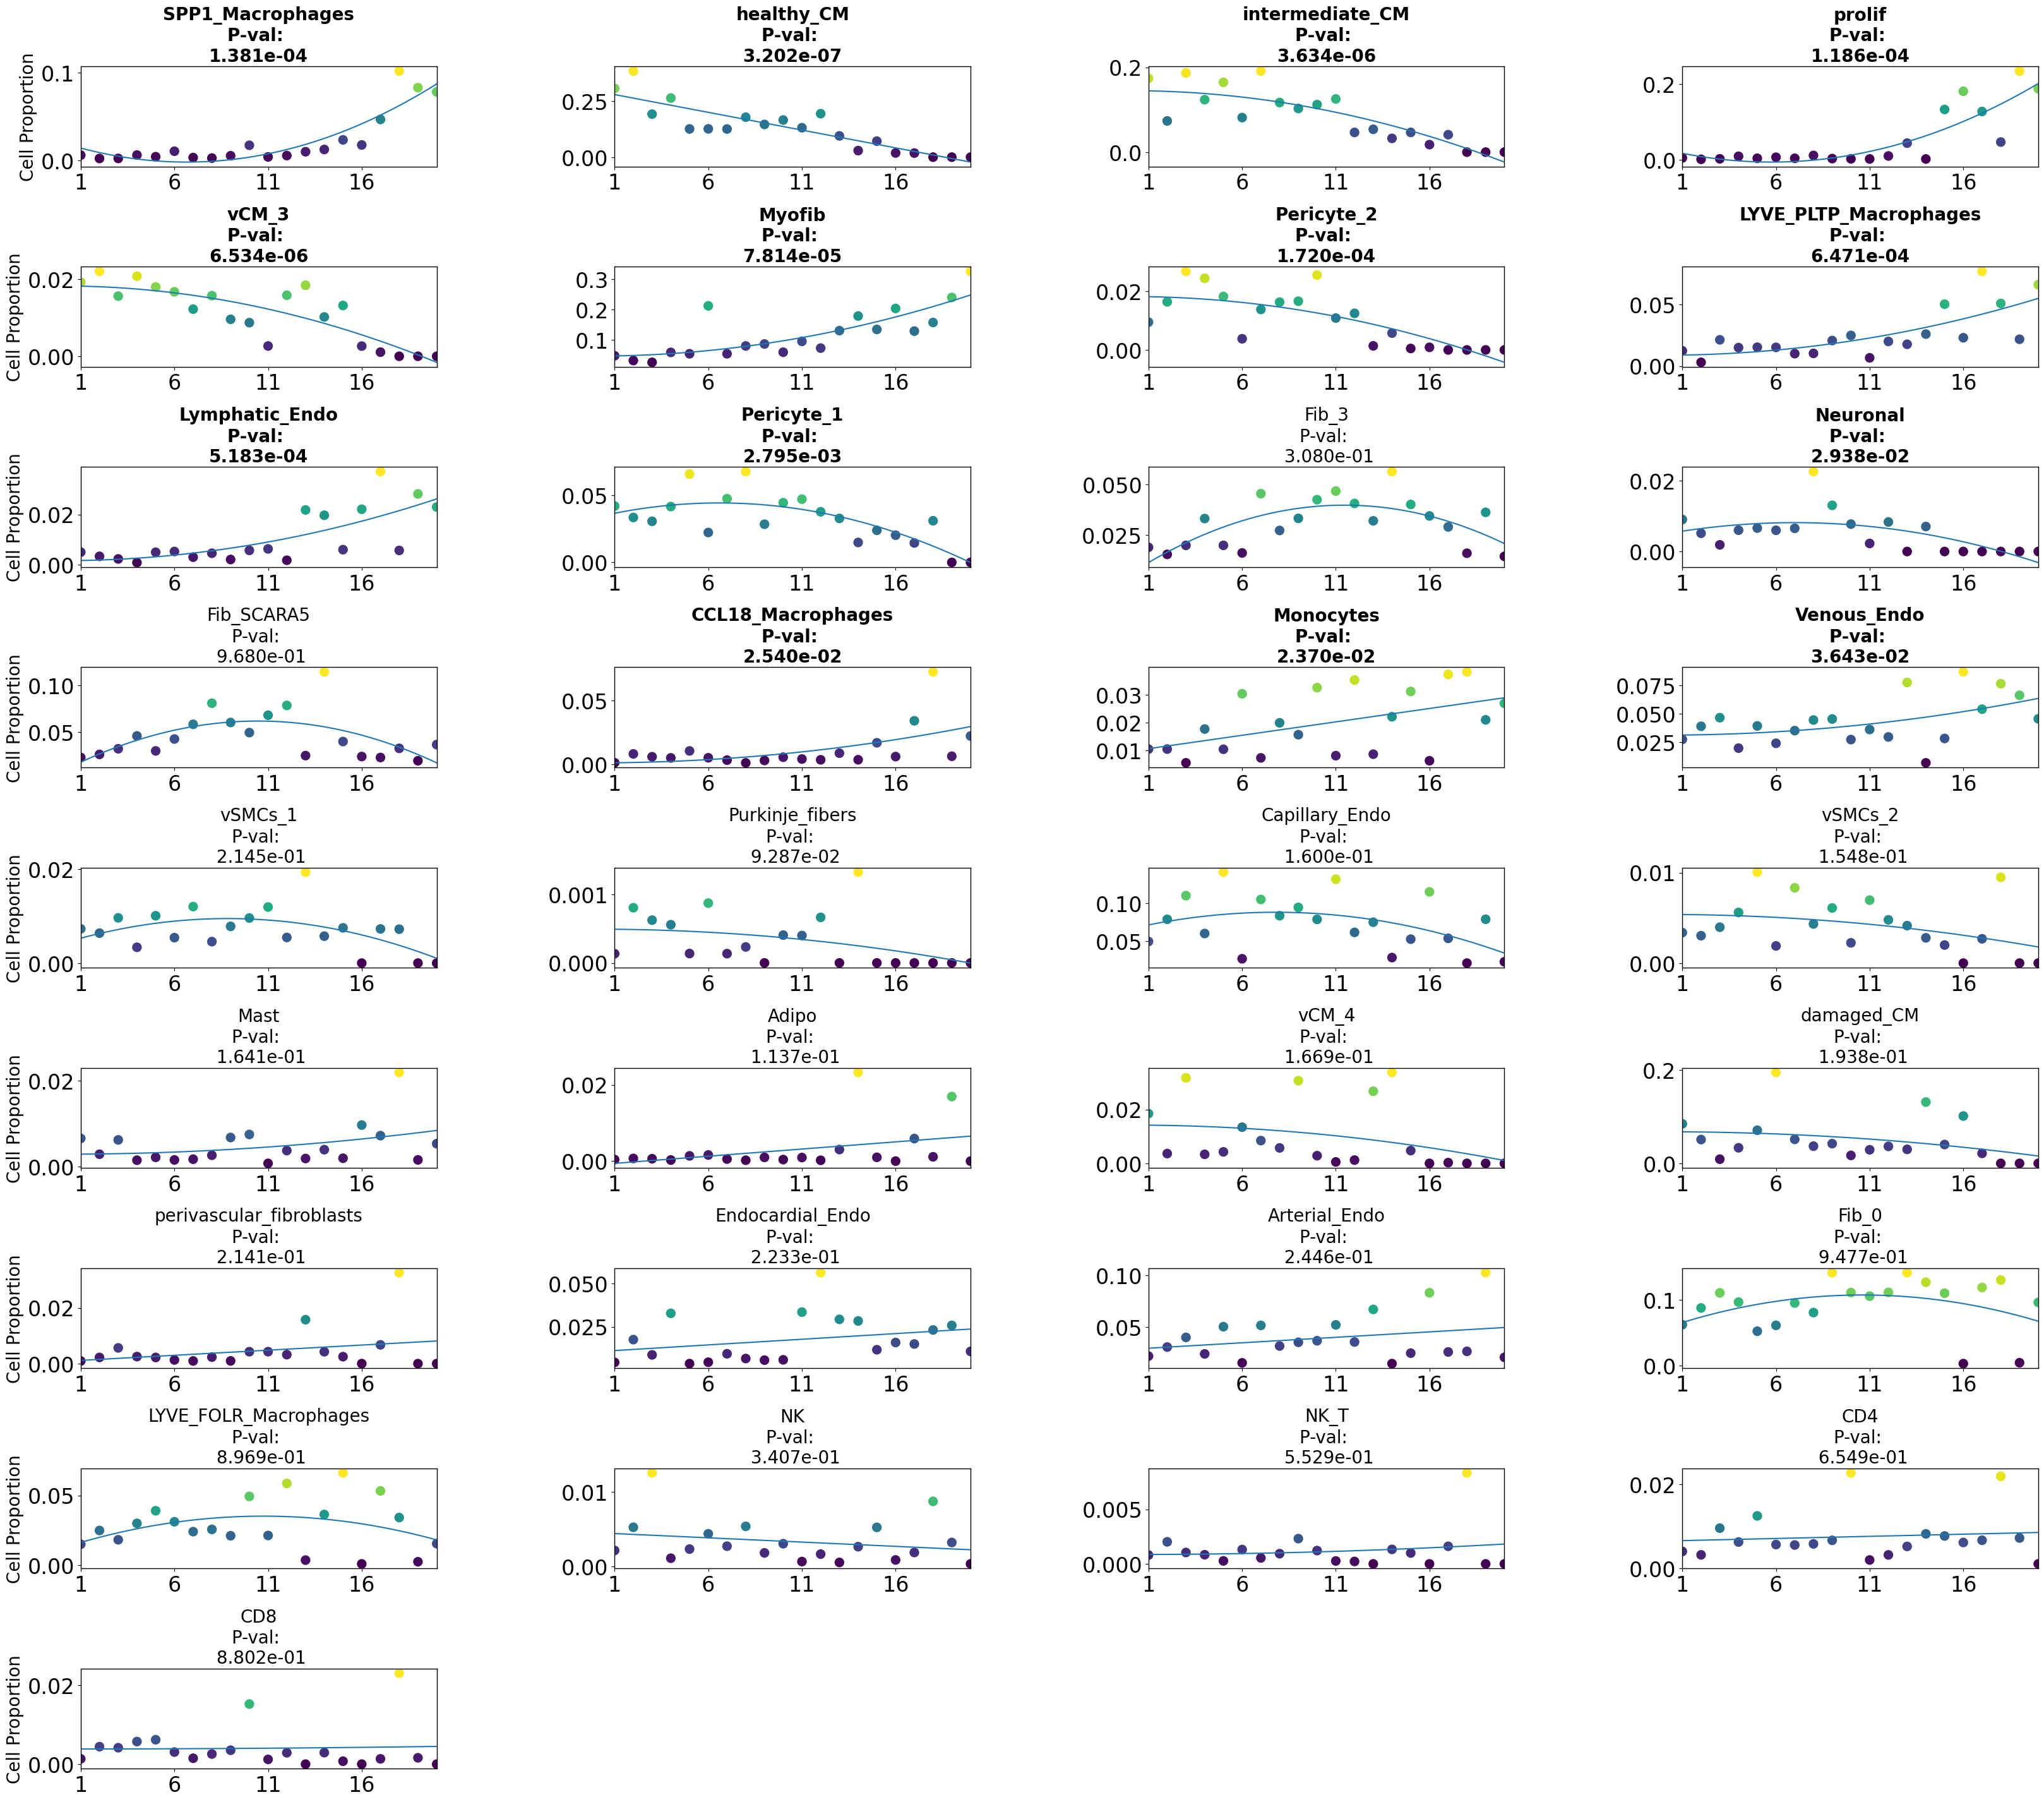

In [7]:
pl.tl.cell_importance(adata)

##### Applyin PILOT for finding Markers

##### Gene selection:
<div class="alert alert-block alert-info"> 
Given that we found interesting cell types, we would like next to investigate genes associated with these trajectories, i.e. genes, which expression changes linear or quadratically with the disease progression. After running the command, you can find a folder named ‘Markers’. There, we will have a folder for each cell type. The file ‘Whole_expressions.csv’ contains all statistics associated with genes for that cell type. Here, we run the genes_importance function for whole cell types.
    
* You need to set names of columns that show cell_types/clusters and Samples/Patinets in your object.
</div>

In [8]:
for cell in adata.uns['cellnames']:
    pl.tl.genes_importance(adata,name_cell=cell,sample_col='sampleID',col_cell='cell_subtype',plot_genes=False)

##### Cluster Specific Marker Changes:
<div class="alert alert-block alert-info"> 
The previous test, only finds genes with significant changes over time for a given cell type. However, it does not consider if a similar pattern and expression values are found in other clusters. To test this, we use a Wald test that compares the fit of the gene in the cluster vs. the fit of the gene in other clusters.

The code snippet below emphasizes genes associated with ‘healthy CM’ and ‘Myofib’. Results are saved in ‘gene_clusters_stats_extend.csv’. You can also see the plots of significant marker genes at “plots_gene_cluster_differentiation”. There, the orange line indicates the fit in the target cell type (shown as orange lines) compared to other cell types (represented by grey lines) 
</div>

In [12]:
pl.tl.gene_cluster_differentiation(cellnames=['healthy_CM','Myofib'],number_genes=70)

##### Exploring the results for a specific cell type :
<div class="alert alert-block alert-info"> 
For example, if we want to find the same myofibroblast genes as reported in the manuscript, we can do the following. To assist you in exploring the results, we offer a function called ‘results_gene_cluster_differentiation’. This function enables you to sort the results according to your preferences. For instance, if you’re interested in obtaining genes related to ‘Myofib’, you can use the function to first filter genes with larger FC than 0.5 and then sort the results based on p-values. This allows you to gain insights into the most relevant genes for your specific analysis.
</div>

In [13]:
pl.tl.results_gene_cluster_differentiation(cluster_name='Myofib').head(10)

,gene,cluster,waldStat,pvalue,FC,Expression pattern,fit-pvalue,fit-mod-rsquared
5775,RORA,Myofib,1461.764959,0.000000e+00,0.899459,quadratic down,7.232834e-174,0.587234
2642,GAS7,Myofib,1120.683802,1.184877e-242,1.086644,linear up quadratic down,1.873033e-107,0.570704
2151,EXT1,Myofib,146.307312,1.649235e-31,0.786136,linear up quadratic down,3.159831e-35,0.555757
1437,COL6A3,Myofib,95.945158,1.156600e-20,1.069156,linear down quadratic up,3.514298e-172,0.608543
1231,CHD9,Myofib,60.300667,5.070009e-13,0.527488,linear up quadratic down,7.658862e-77,0.559604
2824,GSN,Myofib,41.793611,4.437819e-09,0.638136,linear up quadratic down,2.942472e-279,0.601684
1710,DCN,Myofib,27.320866,5.042427e-06,1.033697,linear up quadratic down,1.866152e-284,0.588602
5929,SEC24D,Myofib,22.793274,4.459441e-05,0.806642,linear down quadratic up,6.604860e-64,0.522700
1372,COL1A2,Myofib,17.891454,4.631138e-04,1.327753,linear down quadratic up,0.000000e+00,0.655032
2832,GXYLT2,Myofib,16.558622,8.709144e-04,2.000205,linear up quadratic down,2.402171e-85,0.537920


<Figure size 6400x5600 with 0 Axes>

<Figure size 6400x5600 with 0 Axes>

<Figure size 6400x5600 with 0 Axes>

<Figure size 6400x5600 with 0 Axes>

<Figure size 6400x5600 with 0 Axes>

<Figure size 6400x5600 with 0 Axes>

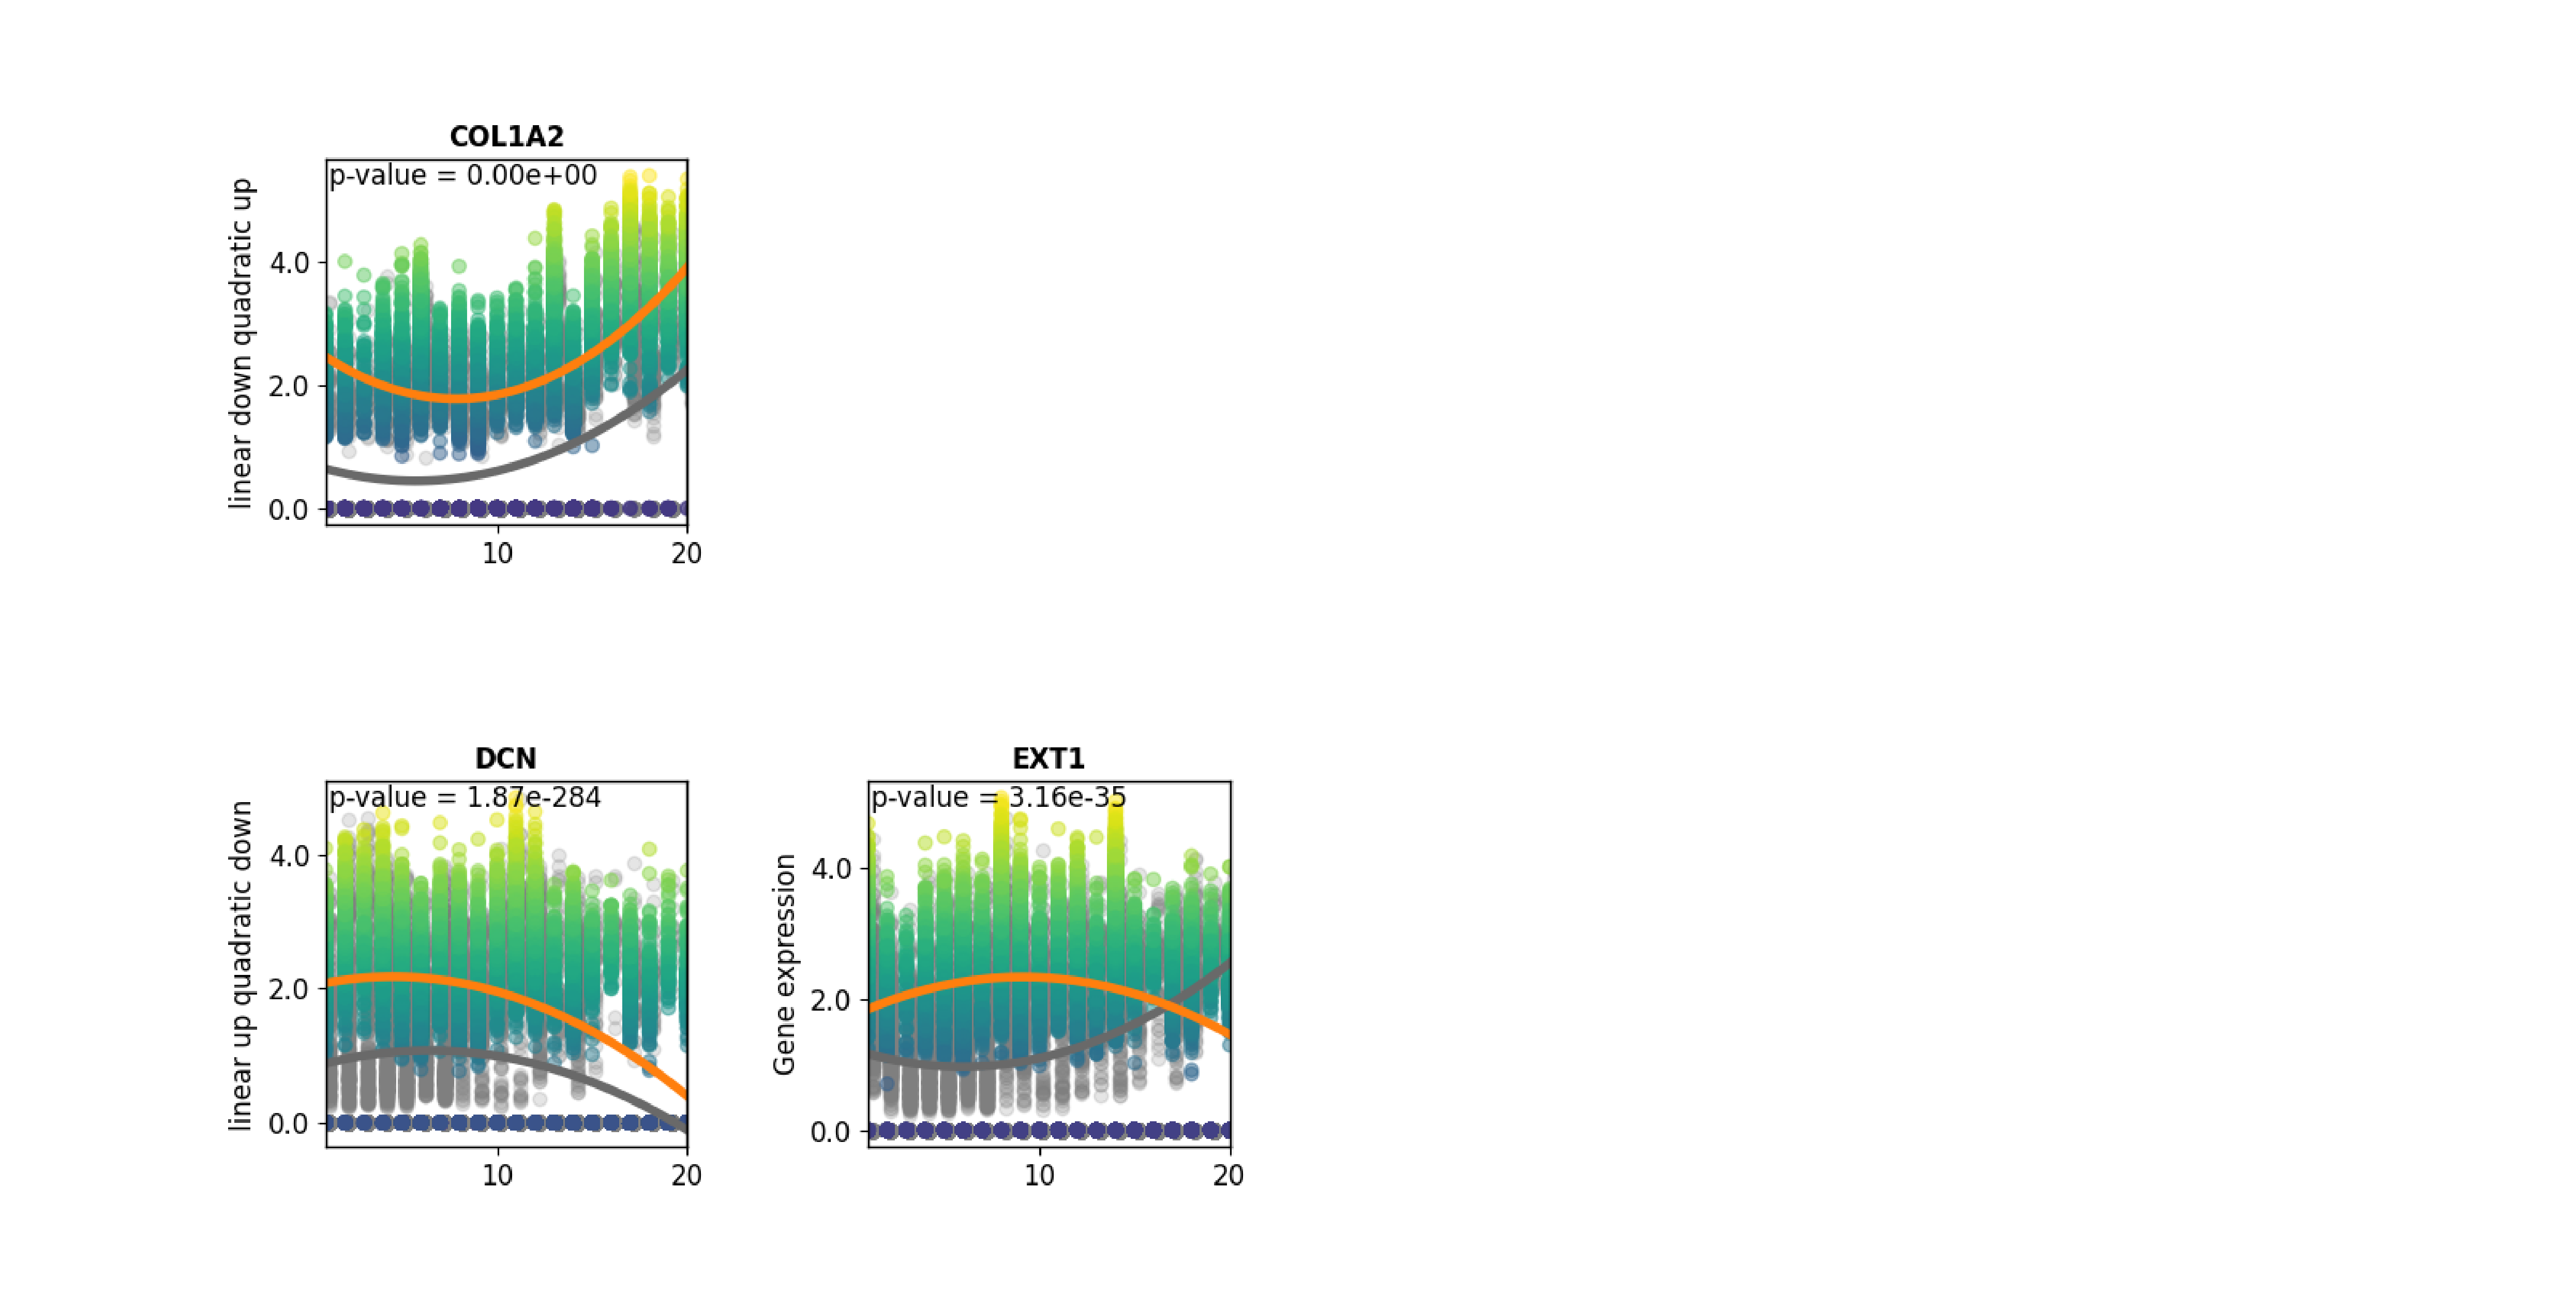

In [16]:
pl.tl.exploring_specific_genes(cluster_name='Myofib',gene_list=['COL1A2','DCN','EXT1'])

<div class="alert alert-block alert-info"> 
The same criteria for healthy_CM cell type.
</div>

In [17]:
pl.tl.results_gene_cluster_differentiation(cluster_name='healthy_CM').head(10)

,gene,cluster,waldStat,pvalue,FC,Expression pattern,fit-pvalue,fit-mod-rsquared
4056,MYBPC3,healthy_CM,1845.821359,0.000000e+00,0.686940,linear up quadratic down,0.000000e+00,0.557570
729,C15orf41,healthy_CM,724.671481,9.379853e-157,1.310601,linear down quadratic up,1.773534e-200,0.556761
3281,LDB3,healthy_CM,656.486992,5.713129e-142,1.426196,linear down quadratic up,1.511694e-238,0.546327
1071,CDH2,healthy_CM,454.785922,2.994244e-98,1.556840,quadratic down,5.715370e-59,0.524421
1276,CMYA5,healthy_CM,397.294439,8.534816e-86,1.559703,linear down quadratic up,3.774063e-66,0.527869
4747,PDE1C,healthy_CM,381.616277,2.123076e-82,1.317905,linear down quadratic up,0.000000e+00,0.591473
2724,GPC5,healthy_CM,342.819206,5.351668e-74,0.940037,quadratic up,5.506685e-207,0.532028
5718,RNF150,healthy_CM,334.905459,2.766278e-72,1.387484,linear down quadratic up,0.000000e+00,0.577805
6466,SVIL,healthy_CM,276.206091,1.401942e-59,0.949376,linear down,6.592469e-10,0.517454
4578,PALLD,healthy_CM,245.180527,7.213877e-53,0.895723,linear down quadratic up,2.137328e-320,0.558163
